# AuNRs DA Figure S3

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from pathlib import Path

%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

## input data

In [2]:
p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/SPP2023")

glass_data = pd.read_csv(Path(p, '090723_glass_training.csv'))
glass_data = glass_data.drop(['corrcoef'], axis=1)
original_data = pd.read_csv(Path(p, 'New_SPP.csv'))
combined_data = pd.concat([glass_data, original_data], axis=0)
combined_data['volume'] = np.pi*(combined_data['width']**2)*combined_data['length']/4 - np.pi*(combined_data['width']**3)/12
combined_data['ratio'] = combined_data['length'] / combined_data['width']

combined_data = combined_data[(combined_data['width'] < 60) & (combined_data['length'] < 130)]
combined_data = combined_data.reset_index(drop=True)
print(combined_data.shape)

# all ITO data
ito_data = pd.read_csv(Path(p, '111623_ito_training.csv'))
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)
print(ito_data.shape)

(1701, 7)
(3292, 6)


In [3]:
exp_ito_data = pd.read_csv(Path(p, '100323_ZJ_exp_ito_final.csv'))
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)
print(exp_ito_data.shape)

exp_ito_data = exp_ito_data[(exp_ito_data['length'] > 75) & (exp_ito_data['length'] < 100)] 
exp_ito_data = exp_ito_data[(exp_ito_data['width'] > 27) & (exp_ito_data['width'] < 32)] 
exp_ito_data = exp_ito_data.reset_index(drop=True)
print(exp_ito_data.shape)

(148, 11)
(106, 11)


In [4]:
p = Path('C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA')
exp_data1 = pd.read_csv(Path(p, '080624_Zhenyang_exp_al2o3_1.csv'))
exp_data2 = pd.read_csv(Path(p, '080624_Zhenyang_exp_al2o3_2.csv'))
# convert str into list after reading csv
exp_data1['exp_ene'] = [ast.literal_eval(df) for df in exp_data1['exp_ene']]
exp_data1['exp_dfs'] = [ast.literal_eval(df) for df in exp_data1['exp_dfs']]
exp_data1['fitting'] = [ast.literal_eval(df) for df in exp_data1['fitting']]
exp_data2['exp_ene'] = [ast.literal_eval(df) for df in exp_data2['exp_ene']]
exp_data2['exp_dfs'] = [ast.literal_eval(df) for df in exp_data2['exp_dfs']]
exp_data2['fitting'] = [ast.literal_eval(df) for df in exp_data2['fitting']]
print(exp_data1.shape, exp_data2.shape)

exp_al2o3_data = pd.concat([exp_data1, exp_data2], axis=0, ignore_index=True)
print(exp_al2o3_data.shape)

(11, 11) (14, 11)
(25, 11)


## Final plot

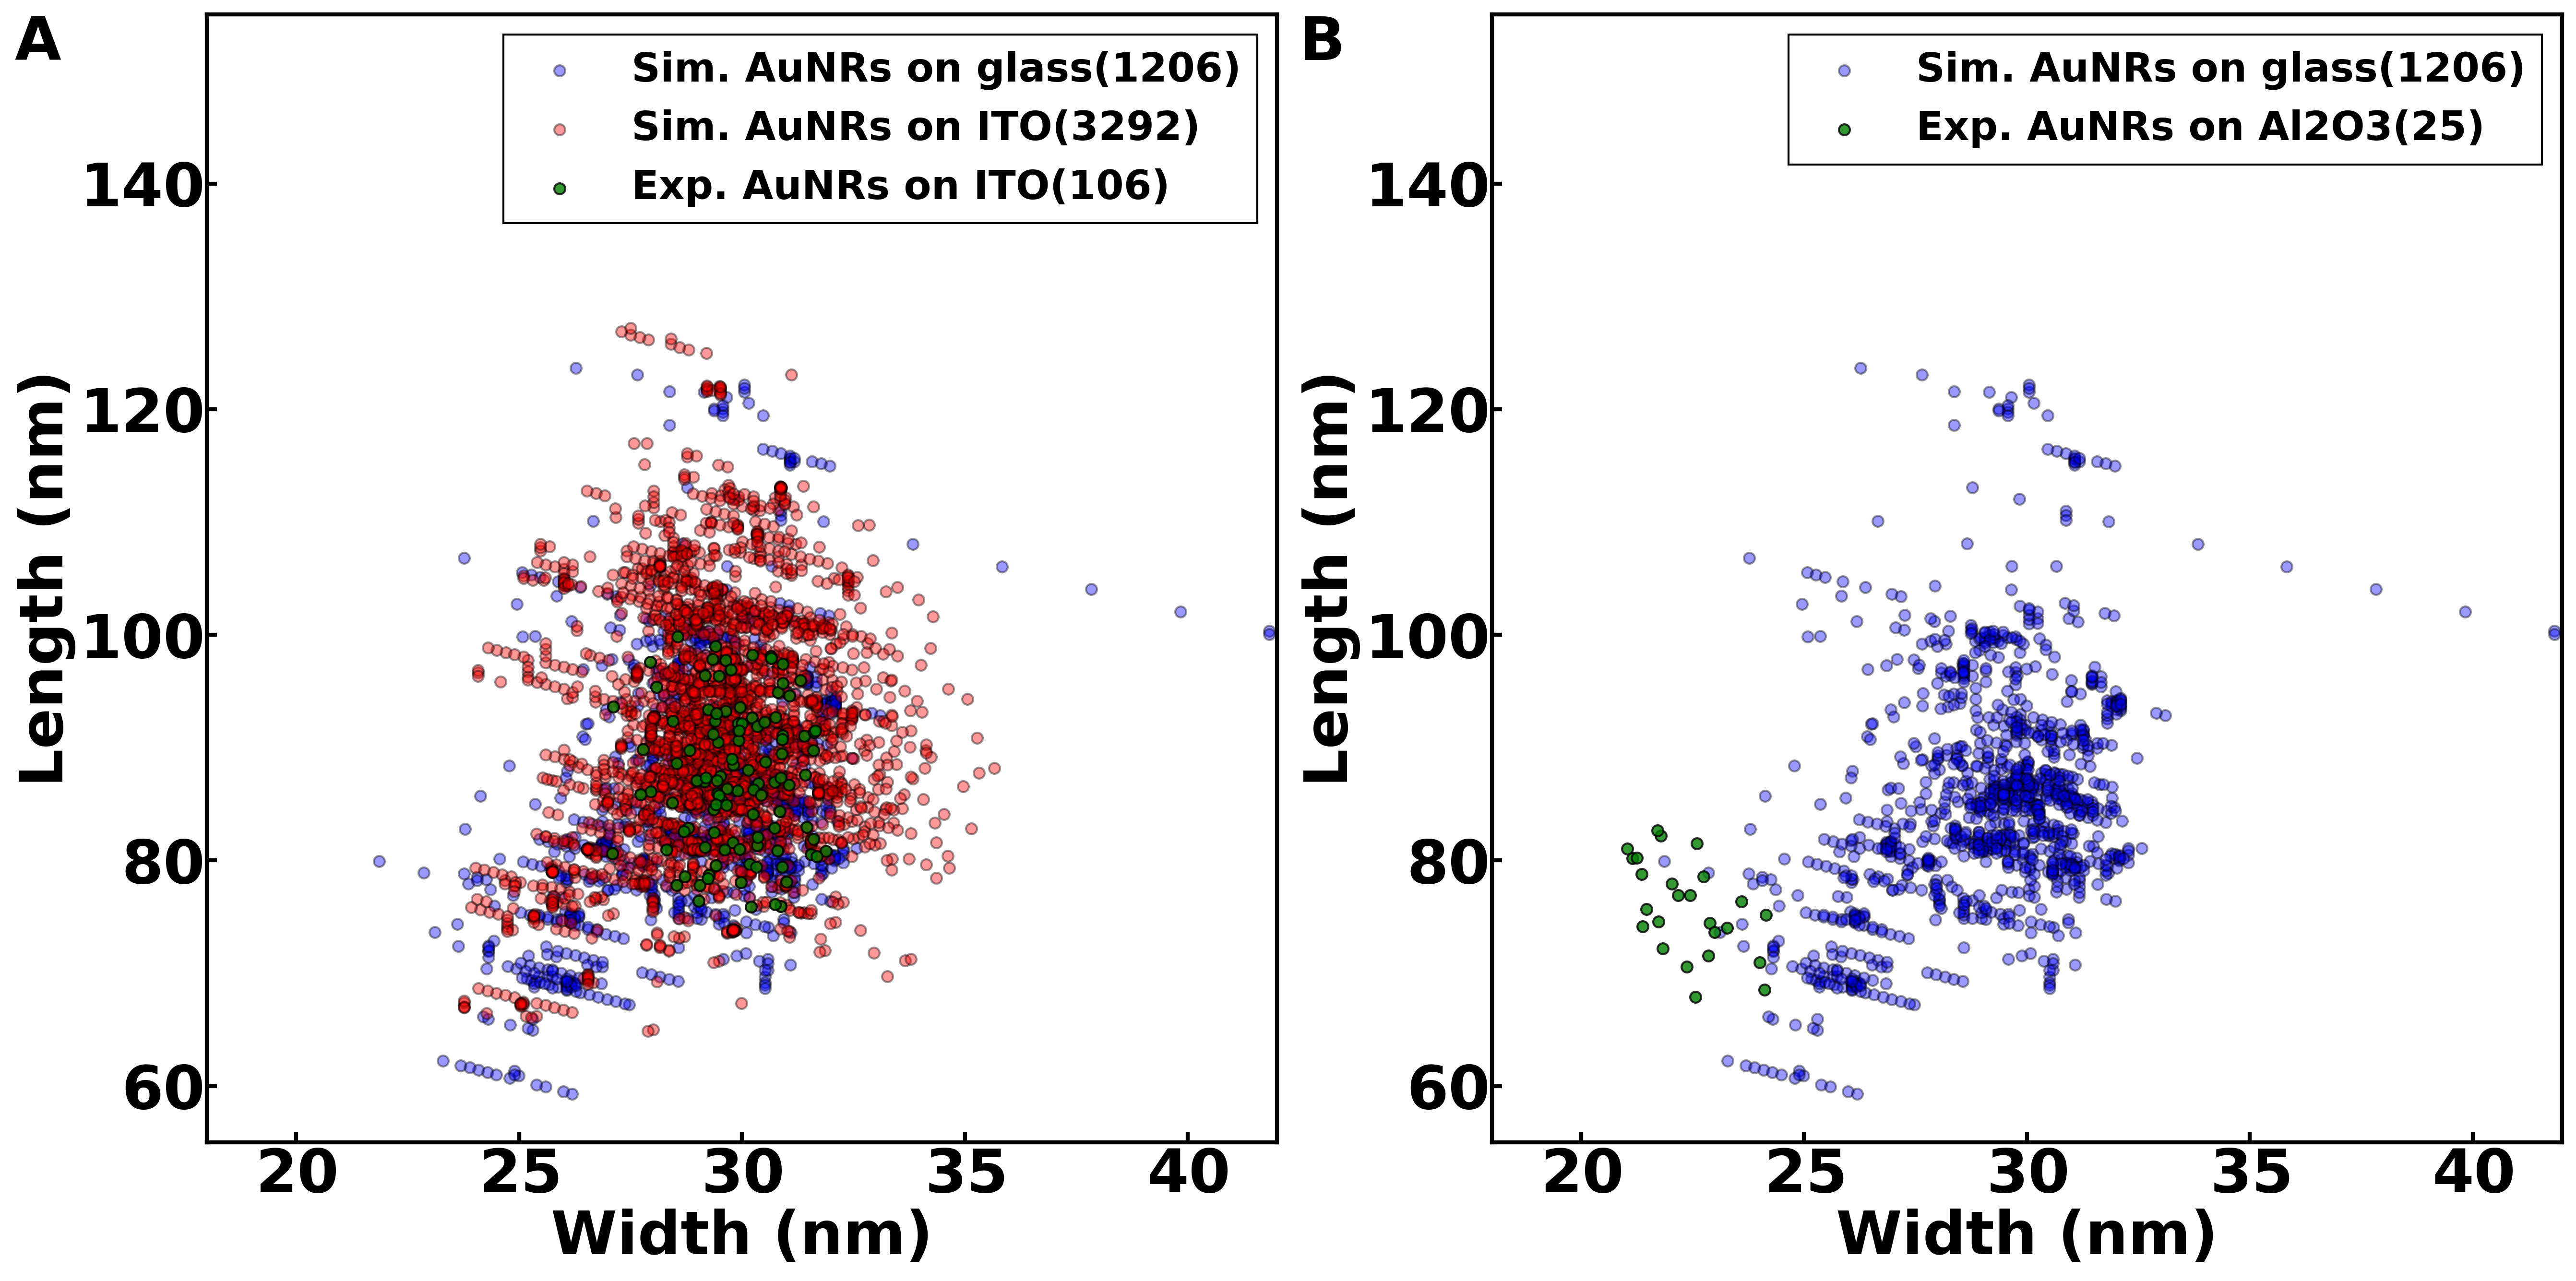

In [13]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), dpi=300)

ax1.scatter(glass_data['width'], glass_data['length'], s=30, c='b', edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on glass({glass_data.shape[0]})')
ax1.scatter(ito_data['width'], ito_data['length'], s=30, c='r', edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on ITO({ito_data.shape[0]})')
ax1.scatter(exp_ito_data['width'], exp_ito_data['length'], s=30, c='g', edgecolor='k', alpha=0.8, label=f'Exp. AuNRs on ITO({exp_ito_data.shape[0]})')

ax1.set_xlabel('Width (nm)', fontsize=30)
ax1.set_ylabel('Length (nm)', fontsize=30)
ax1.set_yticks([60, 80, 100, 120, 140])
ax1.set_xlim(18, 42)
ax1.set_ylim(55, 155)
ax1.tick_params(axis='both', labelsize=30, pad=2)
ax1.legend(loc='upper right', fontsize=20)
ax1.text(-0.18, 1, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ax2.scatter(glass_data['width'], glass_data['length'], s=30, c='b', edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on glass({glass_data.shape[0]})')
ax2.scatter(exp_al2o3_data['width'], exp_al2o3_data['length'], s=30, c='g', edgecolor='k', alpha=0.8, label=f'Exp. AuNRs on Al2O3({exp_al2o3_data.shape[0]})')

ax2.set_xlabel('Width (nm)', fontsize=30)
ax2.set_ylabel('Length (nm)', fontsize=30)
ax2.set_xticks([20, 25, 30, 35, 40])
ax2.set_yticks([60, 80, 100, 120, 140])
ax2.set_xlim(18, 42)
ax2.set_ylim(55, 155)
ax2.tick_params(axis='both', labelsize=30, pad=2)
ax2.legend(loc='upper right', fontsize=20)
ax2.text(-0.18, 1, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)